# Load required Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Dataset: ECG heartbeats from the LTAF database

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


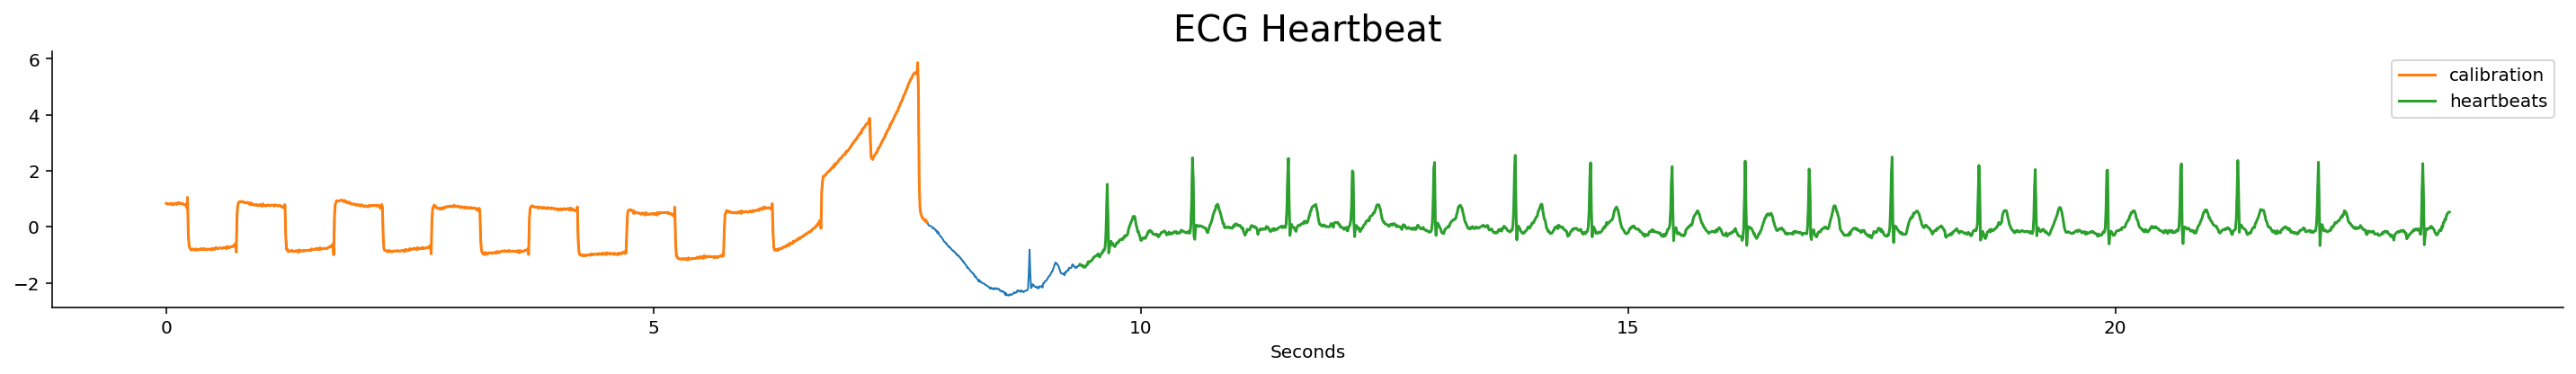

In [2]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

## First, we learn the length(s) of the motifs from the data

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.57it/s]


Motif Length: 12 	 0.09375 	AU_PEF: 0.361 	#Elbows: 5


Compute ks: 100%|███████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 128.62it/s]


Motif Length: 25 	 0.1953125 	AU_PEF: 0.4 	#Elbows: 5


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 89.55it/s]


Motif Length: 37 	 0.2890625 	AU_PEF: 0.36 	#Elbows: 5


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 74.93it/s]


Motif Length: 50 	 0.390625 	AU_PEF: 0.279 	#Elbows: 5


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 61.74it/s]


Motif Length: 62 	 0.484375 	AU_PEF: 0.267 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 63.45it/s]


Motif Length: 75 	 0.5859375 	AU_PEF: 0.375 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 51.72it/s]


Motif Length: 87 	 0.6796875 	AU_PEF: 0.462 	#Elbows: 4


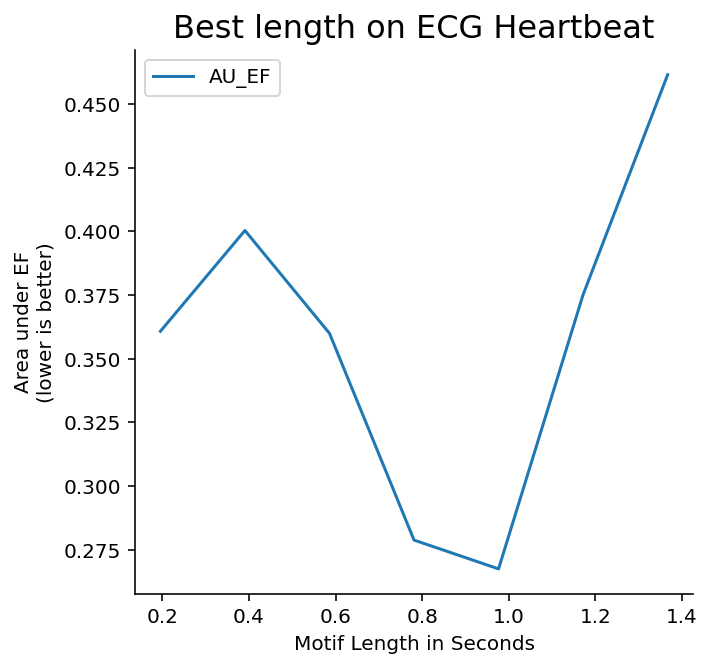

Found motif length 125


In [3]:
ks = 20
length_range = np.arange(25,200,25)
motif_length = plot_motif_length_selection(
    ks, series, file,
    motif_length_range=length_range, ds_name=ds_name)

print("Found motif length", motif_length)

## Finally, we run k-Motiflets with the found motif length

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 13.84it/s]


Chosen window-size: 125
Identified Elbow Points [ 6  9 16]
Filtered Elbow Points [6, 16]


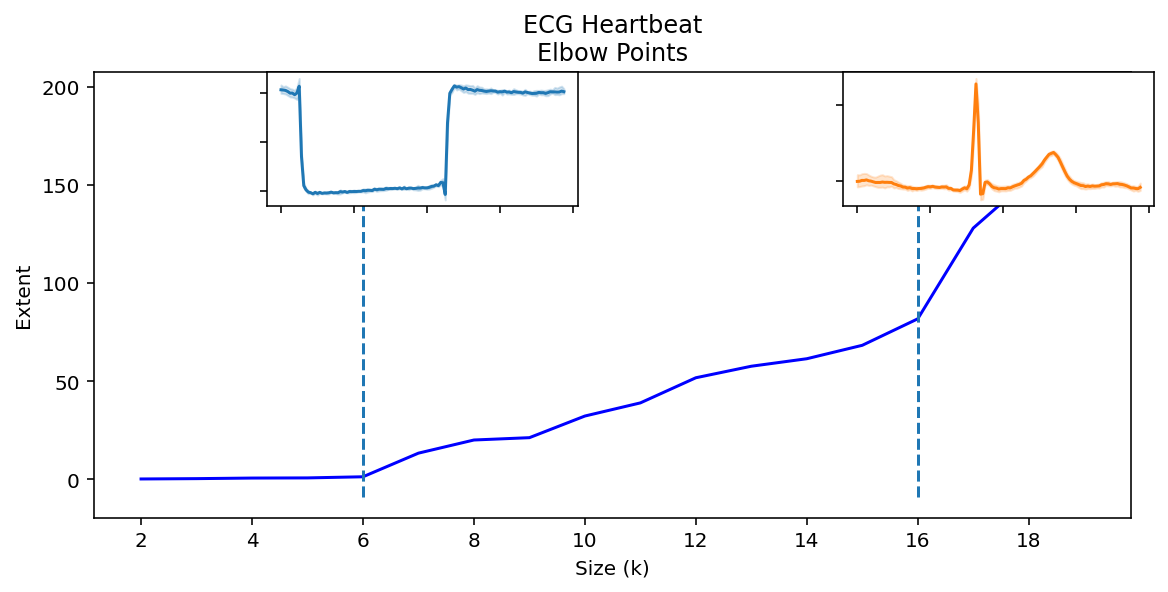

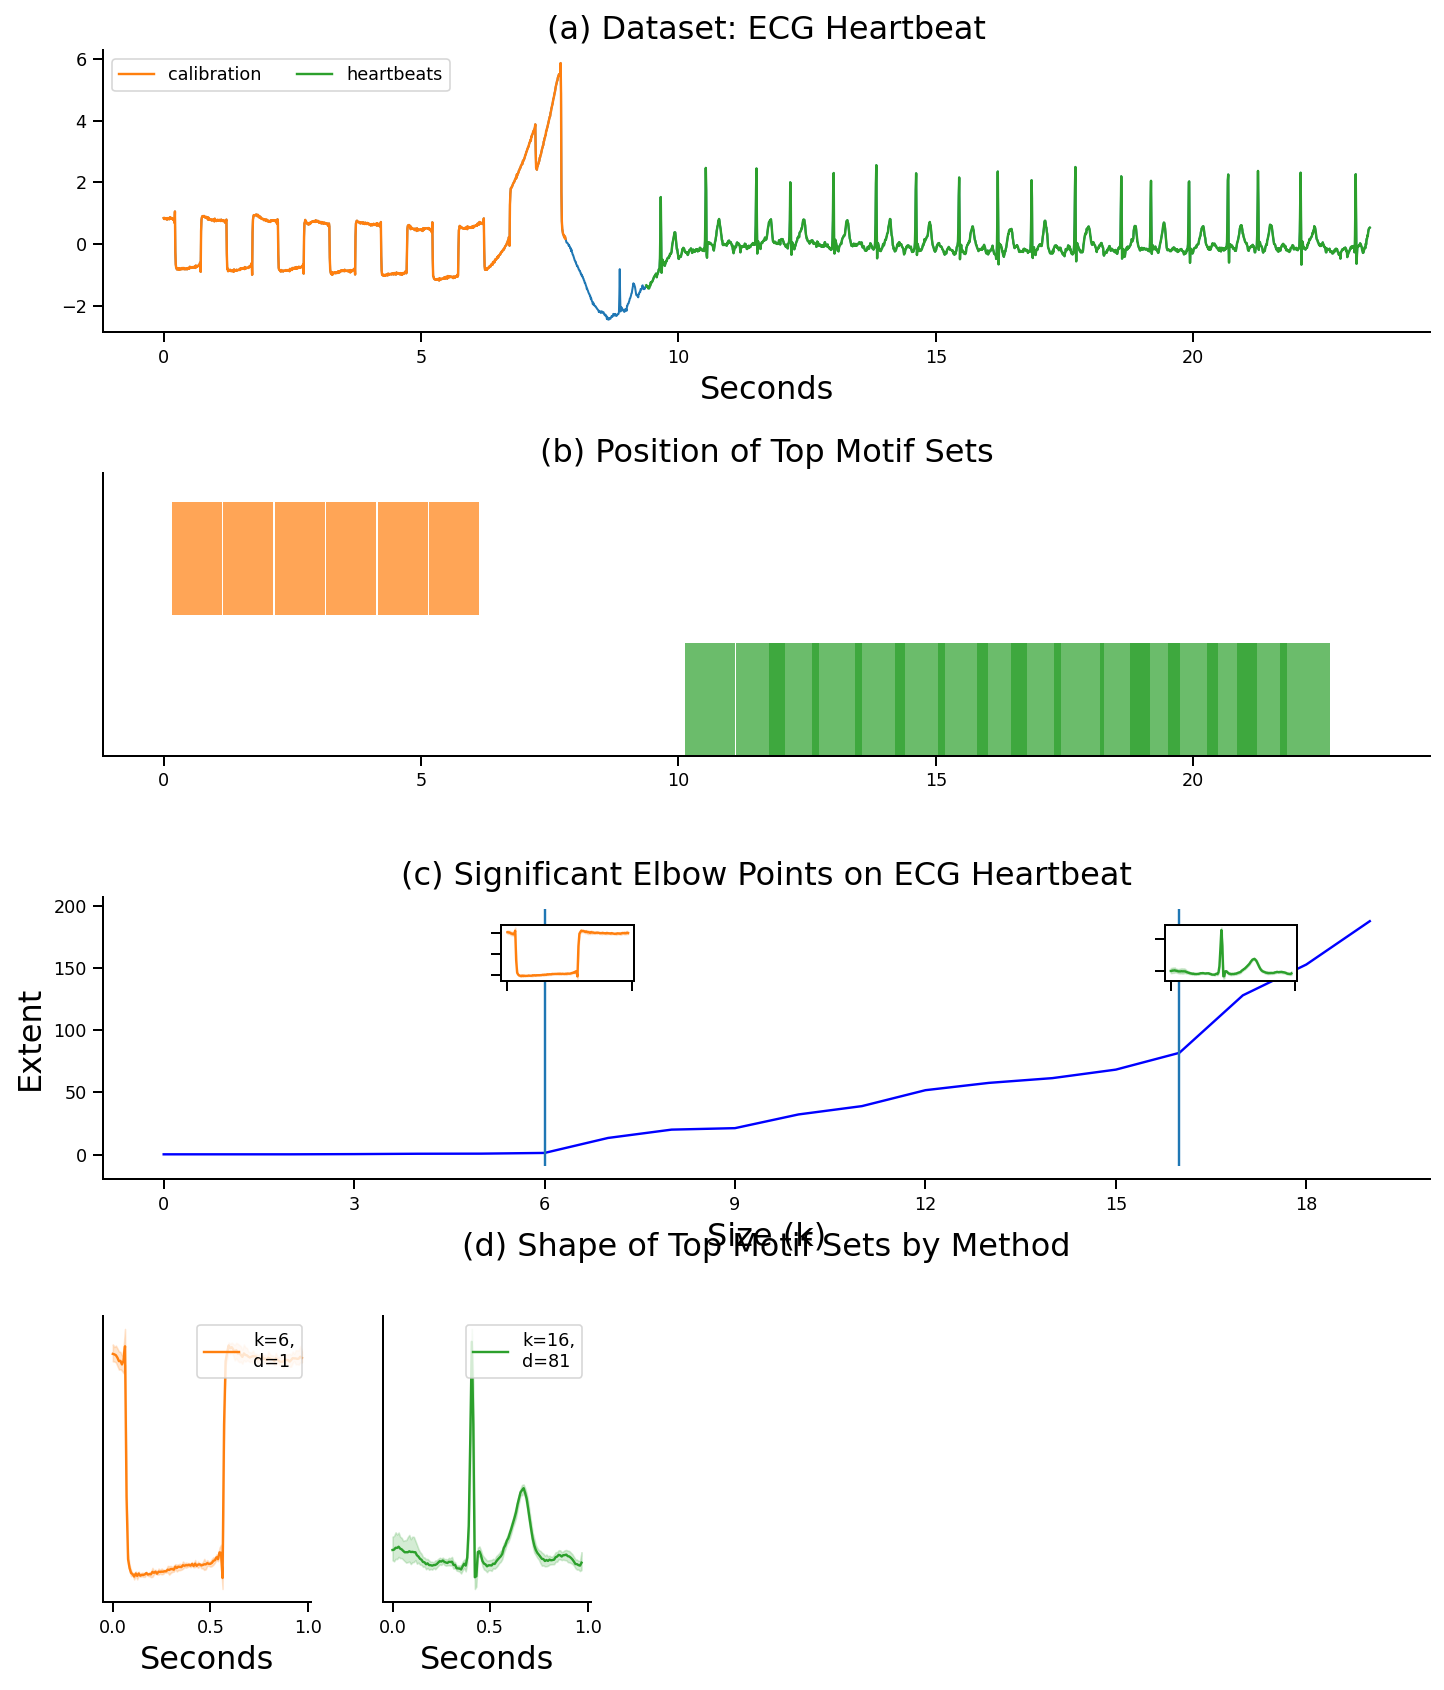

In [4]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    ds_name=ds_name, 
    motif_length=motif_length, 
    ground_truth=df_gt)

<hr>

# Dataset: Muscle Activation Dataset

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


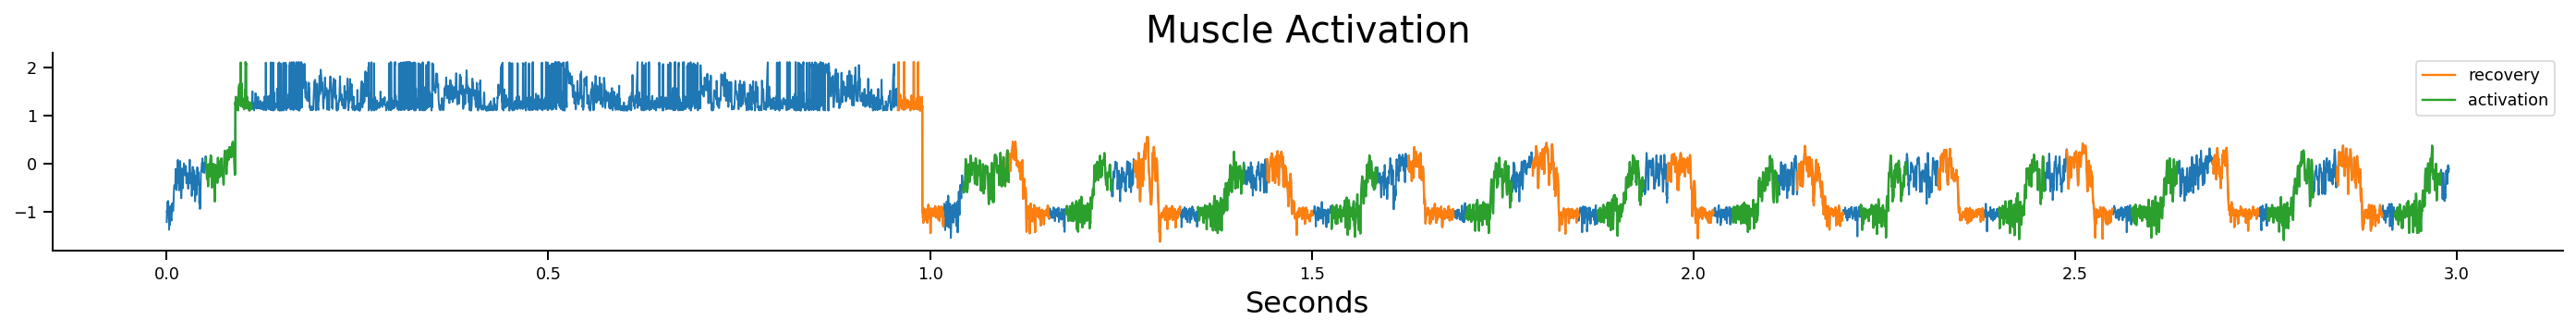

In [5]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"

series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

## Motif-Length Selection

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  6.20it/s]


Motif Length: 200 	 0.04 	AU_PEF: 0.212 	#Elbows: 3


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  5.45it/s]


Motif Length: 250 	 0.05 	AU_PEF: 0.212 	#Elbows: 1


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.54it/s]


Motif Length: 300 	 0.06 	AU_PEF: 0.179 	#Elbows: 2


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  4.04it/s]


Motif Length: 350 	 0.07 	AU_PEF: 0.185 	#Elbows: 2


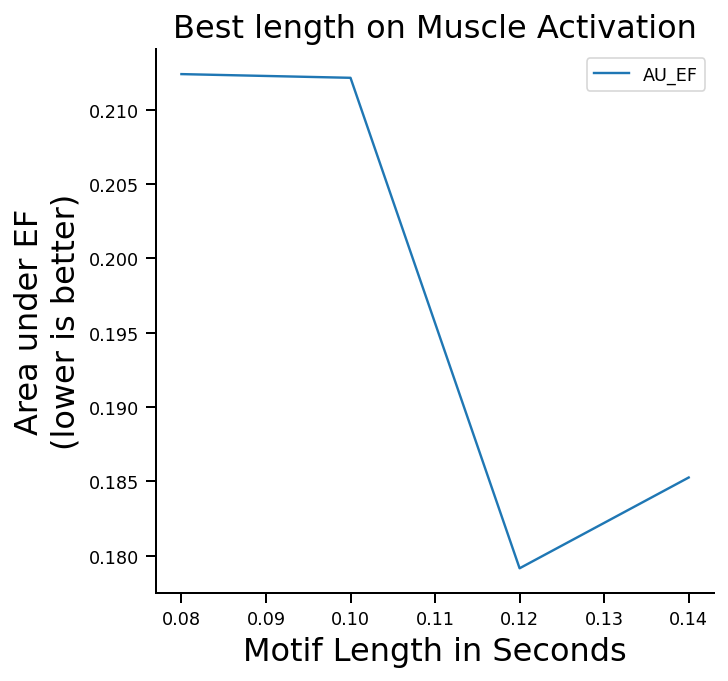

Found motif length 600


In [6]:
k = 15
length_range = np.arange(400,701,100) 

motif_length = plot_motif_length_selection(
    k, series, file, length_range, ds_name=ds_name)

print("Found motif length", motif_length)

## Top-1 k-Motiflets

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 13/13 [00:11<00:00,  1.11it/s]


Chosen window-size: 600
Identified Elbow Points [ 9 12]
Filtered Elbow Points [12]


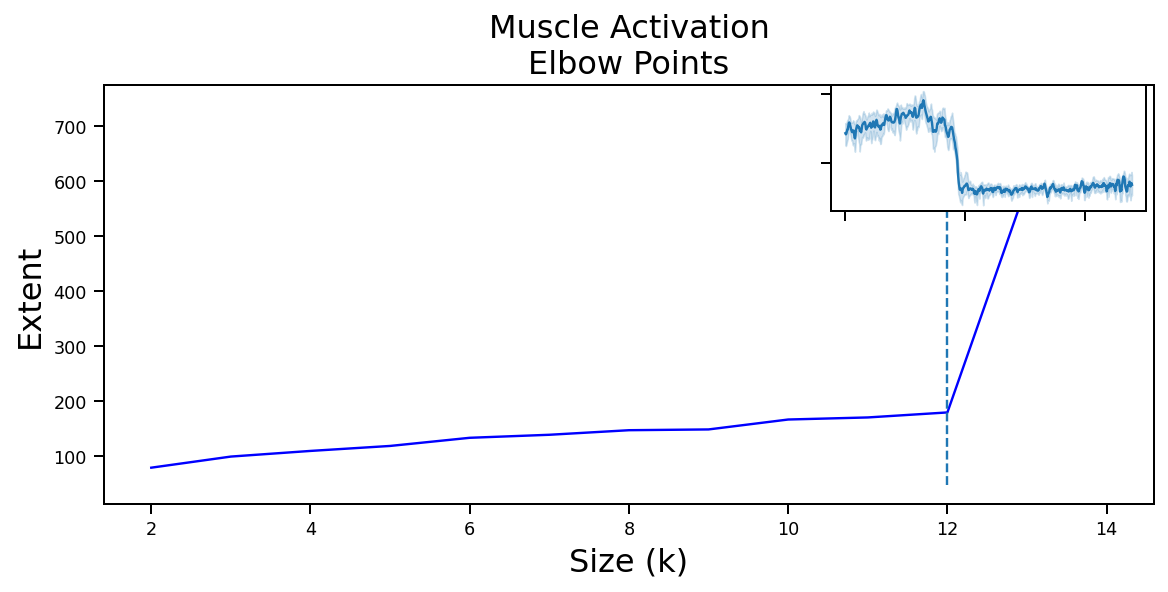

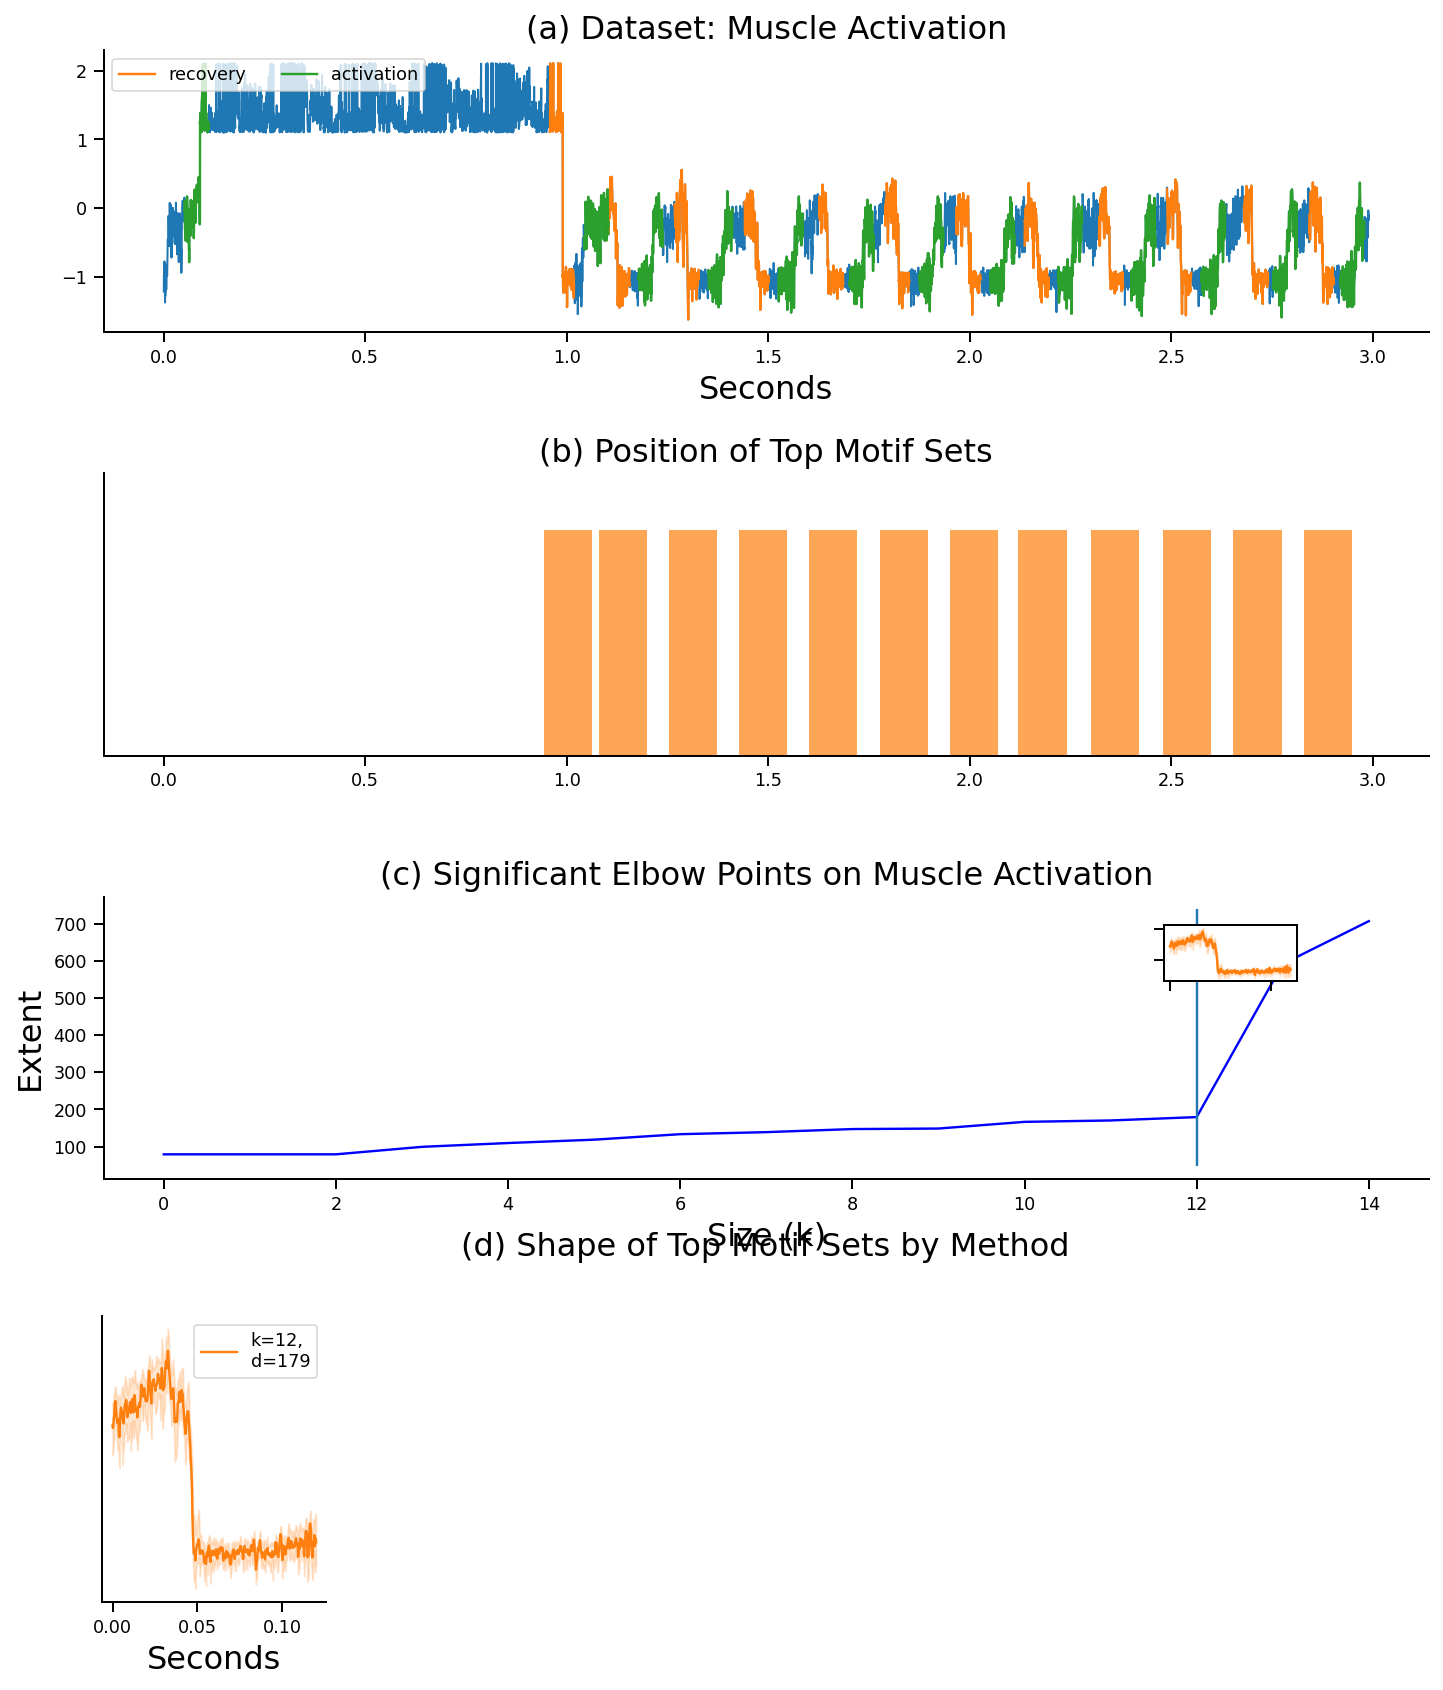

In [7]:
dists, candidates, elbow_points = plot_elbow(
    k, series, file, ds_name=ds_name, 
    motif_length=motif_length, ground_truth=df_gt)

## Top-2 k-Motiflets

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.71it/s]


Chosen window-size: 600
Identified Elbow Points [ 8 11]
Filtered Elbow Points [11]


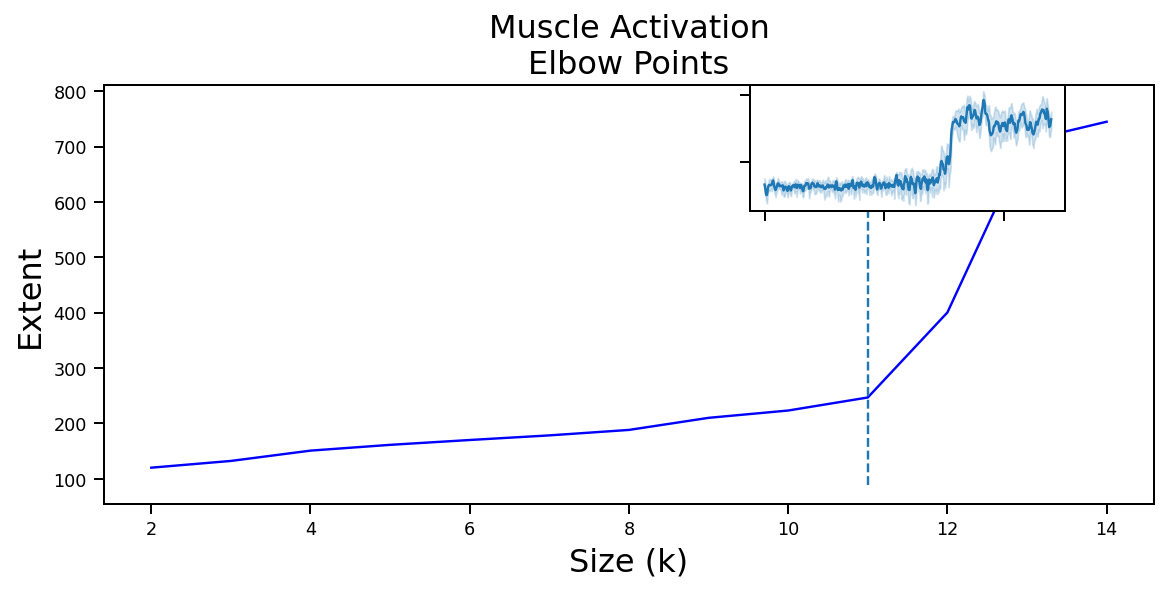

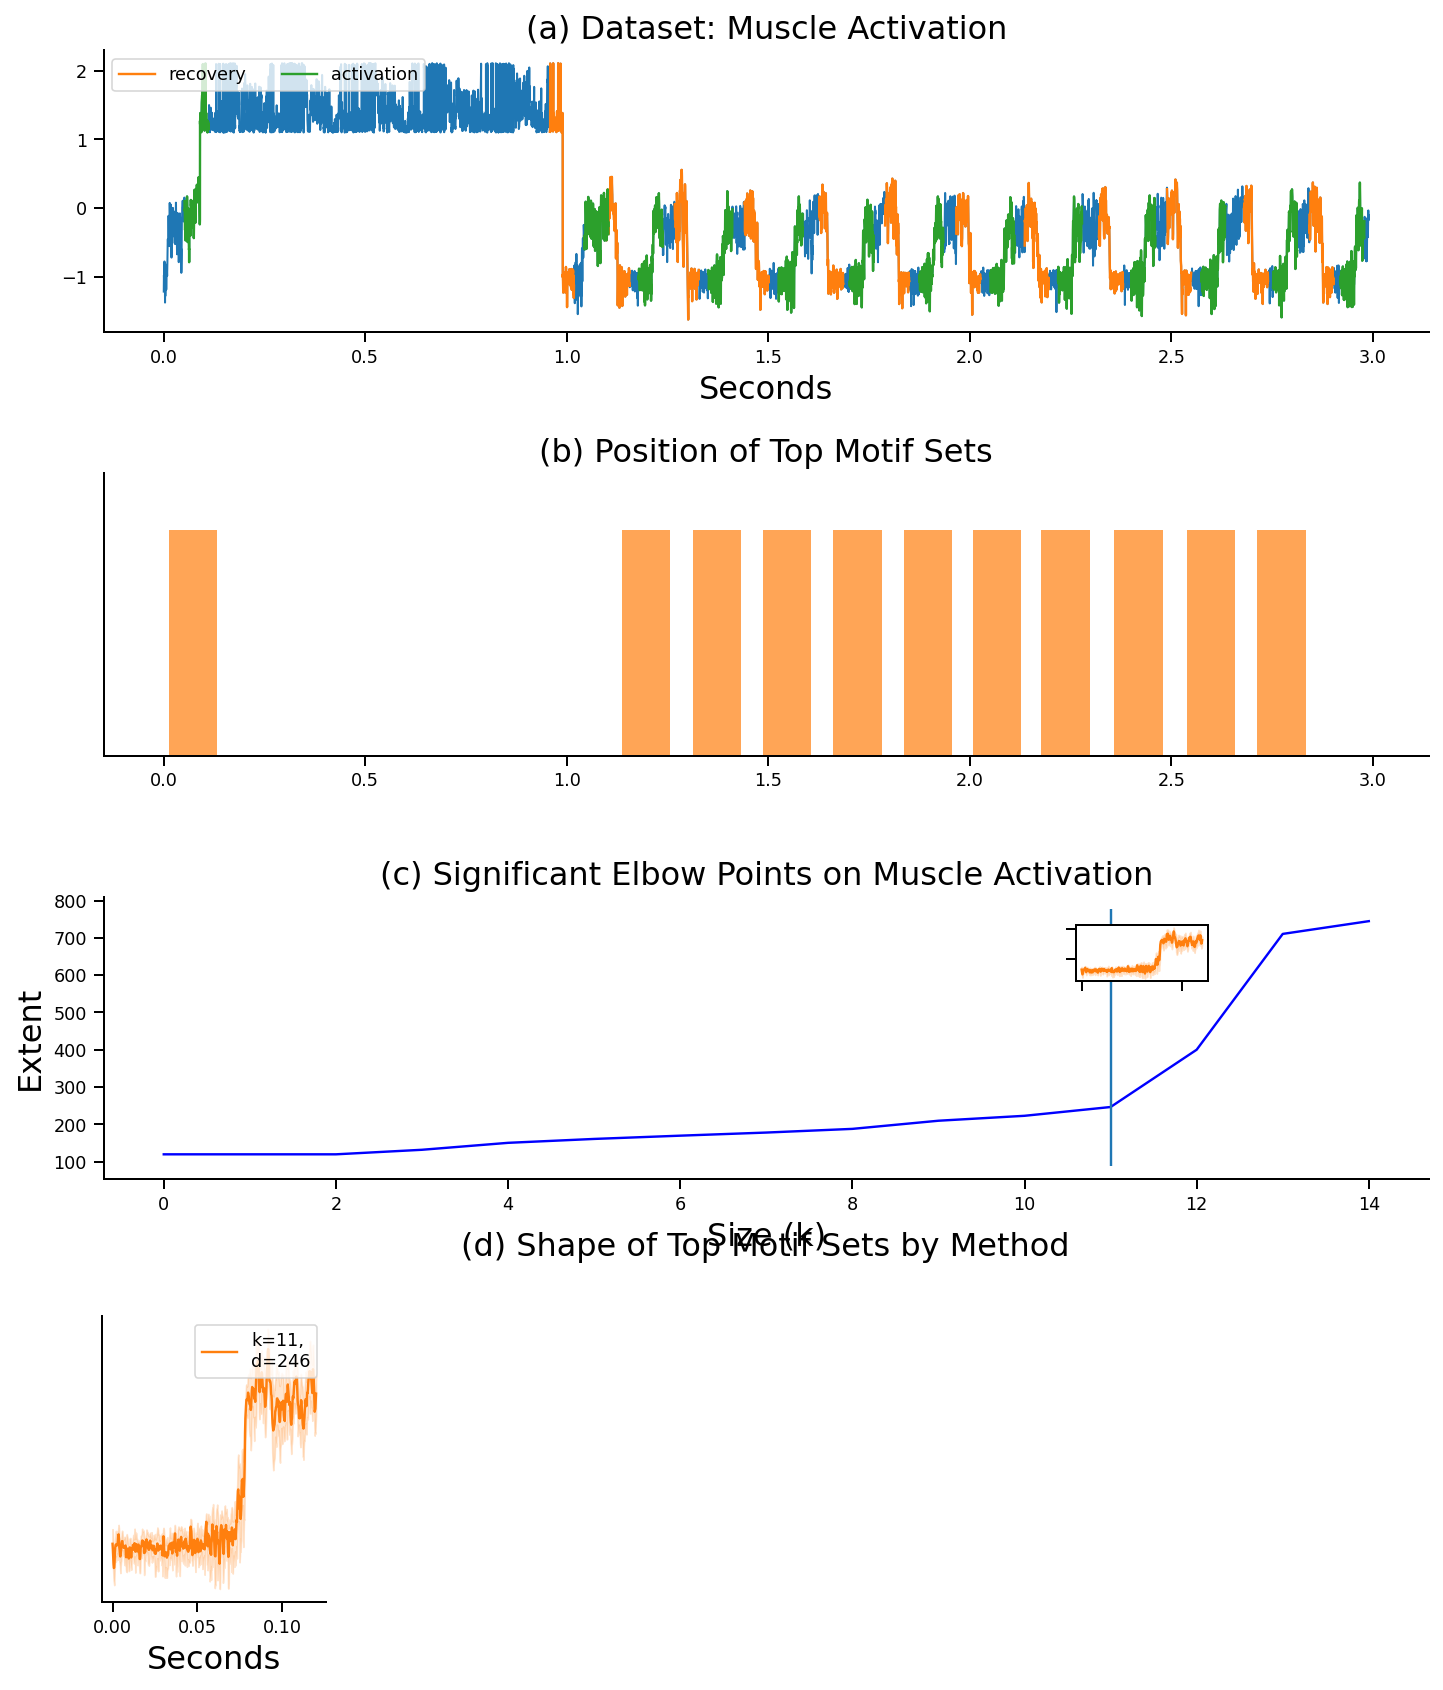

In [8]:
dists2, candidates2, elbow_points2 = plot_elbow(
    k, series, file, ds_name=ds_name, 
    exclusion=candidates, motif_length=motif_length, ground_truth=df_gt)

<hr>

# Dataset: Physiodata - EEG sleep data
    
### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


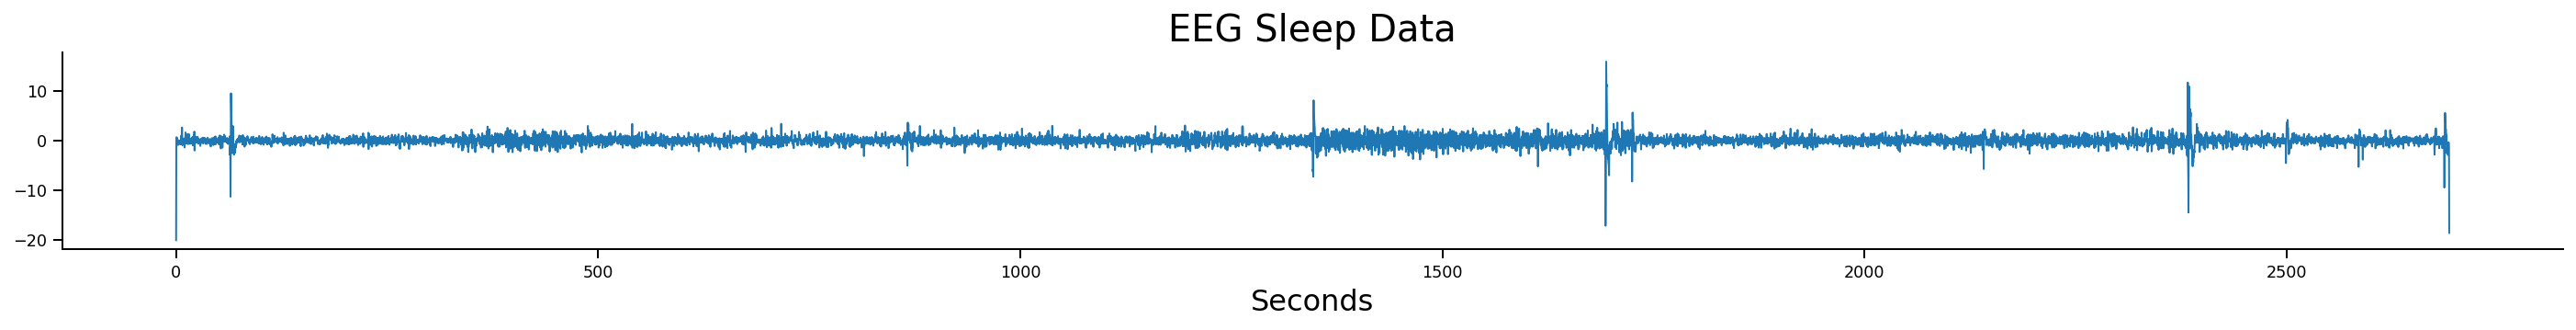

In [9]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.87it/s]


Motif Length: 7 	 1.82 	AU_PEF: 0.498 	#Elbows: 3


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.59it/s]


Motif Length: 12 	 3.12 	AU_PEF: 0.548 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.78it/s]


Motif Length: 17 	 4.42 	AU_PEF: 0.511 	#Elbows: 5


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.79it/s]


Motif Length: 22 	 5.72 	AU_PEF: 0.514 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.80it/s]


Motif Length: 27 	 7.02 	AU_PEF: 0.531 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.70it/s]


Motif Length: 32 	 8.32 	AU_PEF: 0.52 	#Elbows: 5


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.73it/s]


Motif Length: 37 	 9.62 	AU_PEF: 0.54 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.74it/s]


Motif Length: 42 	 10.92 	AU_PEF: 0.538 	#Elbows: 3


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.76it/s]


Motif Length: 47 	 12.22 	AU_PEF: 0.537 	#Elbows: 3


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.72it/s]


Motif Length: 52 	 13.52 	AU_PEF: 0.555 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.84it/s]


Motif Length: 57 	 14.82 	AU_PEF: 0.552 	#Elbows: 5


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.84it/s]


Motif Length: 62 	 16.12 	AU_PEF: 0.567 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.81it/s]


Motif Length: 67 	 17.42 	AU_PEF: 0.564 	#Elbows: 4


Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.56it/s]


Motif Length: 72 	 18.72 	AU_PEF: 0.584 	#Elbows: 4


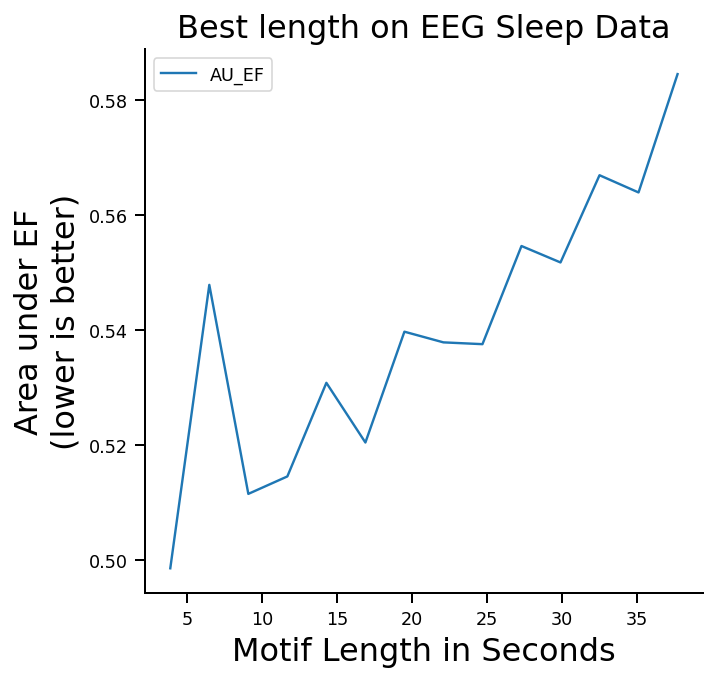

In [10]:
ks = 20
length_range = np.arange(15,151,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# k-Komplex

Compute ks: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:17<00:00,  1.02it/s]


Chosen window-size: 115
Identified Elbow Points [ 3 10 14 16]
Filtered Elbow Points [3, 16]


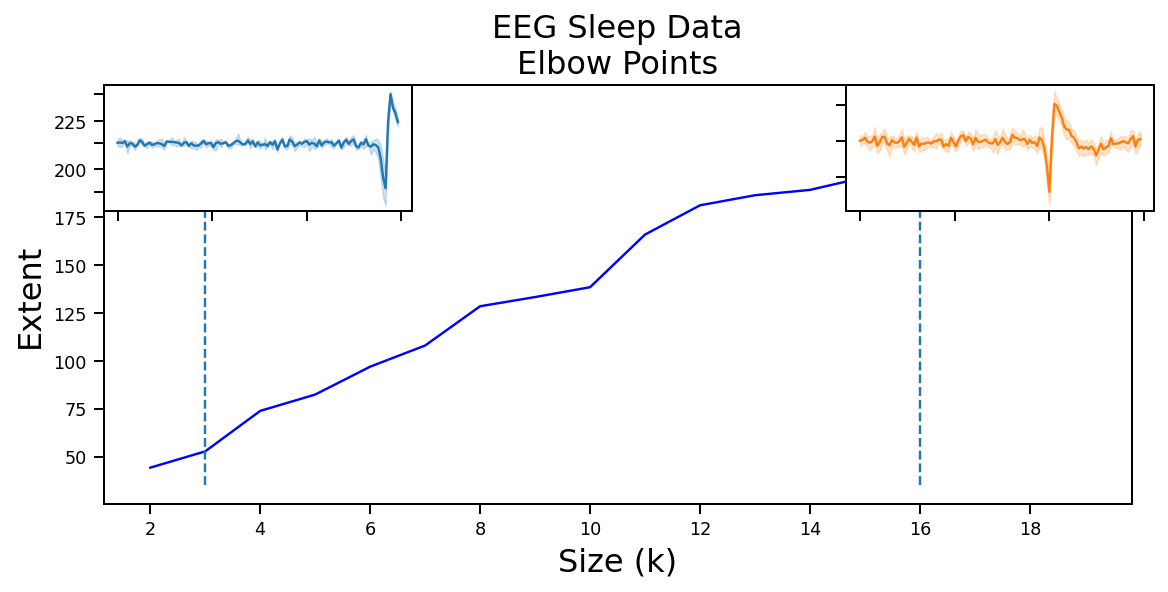

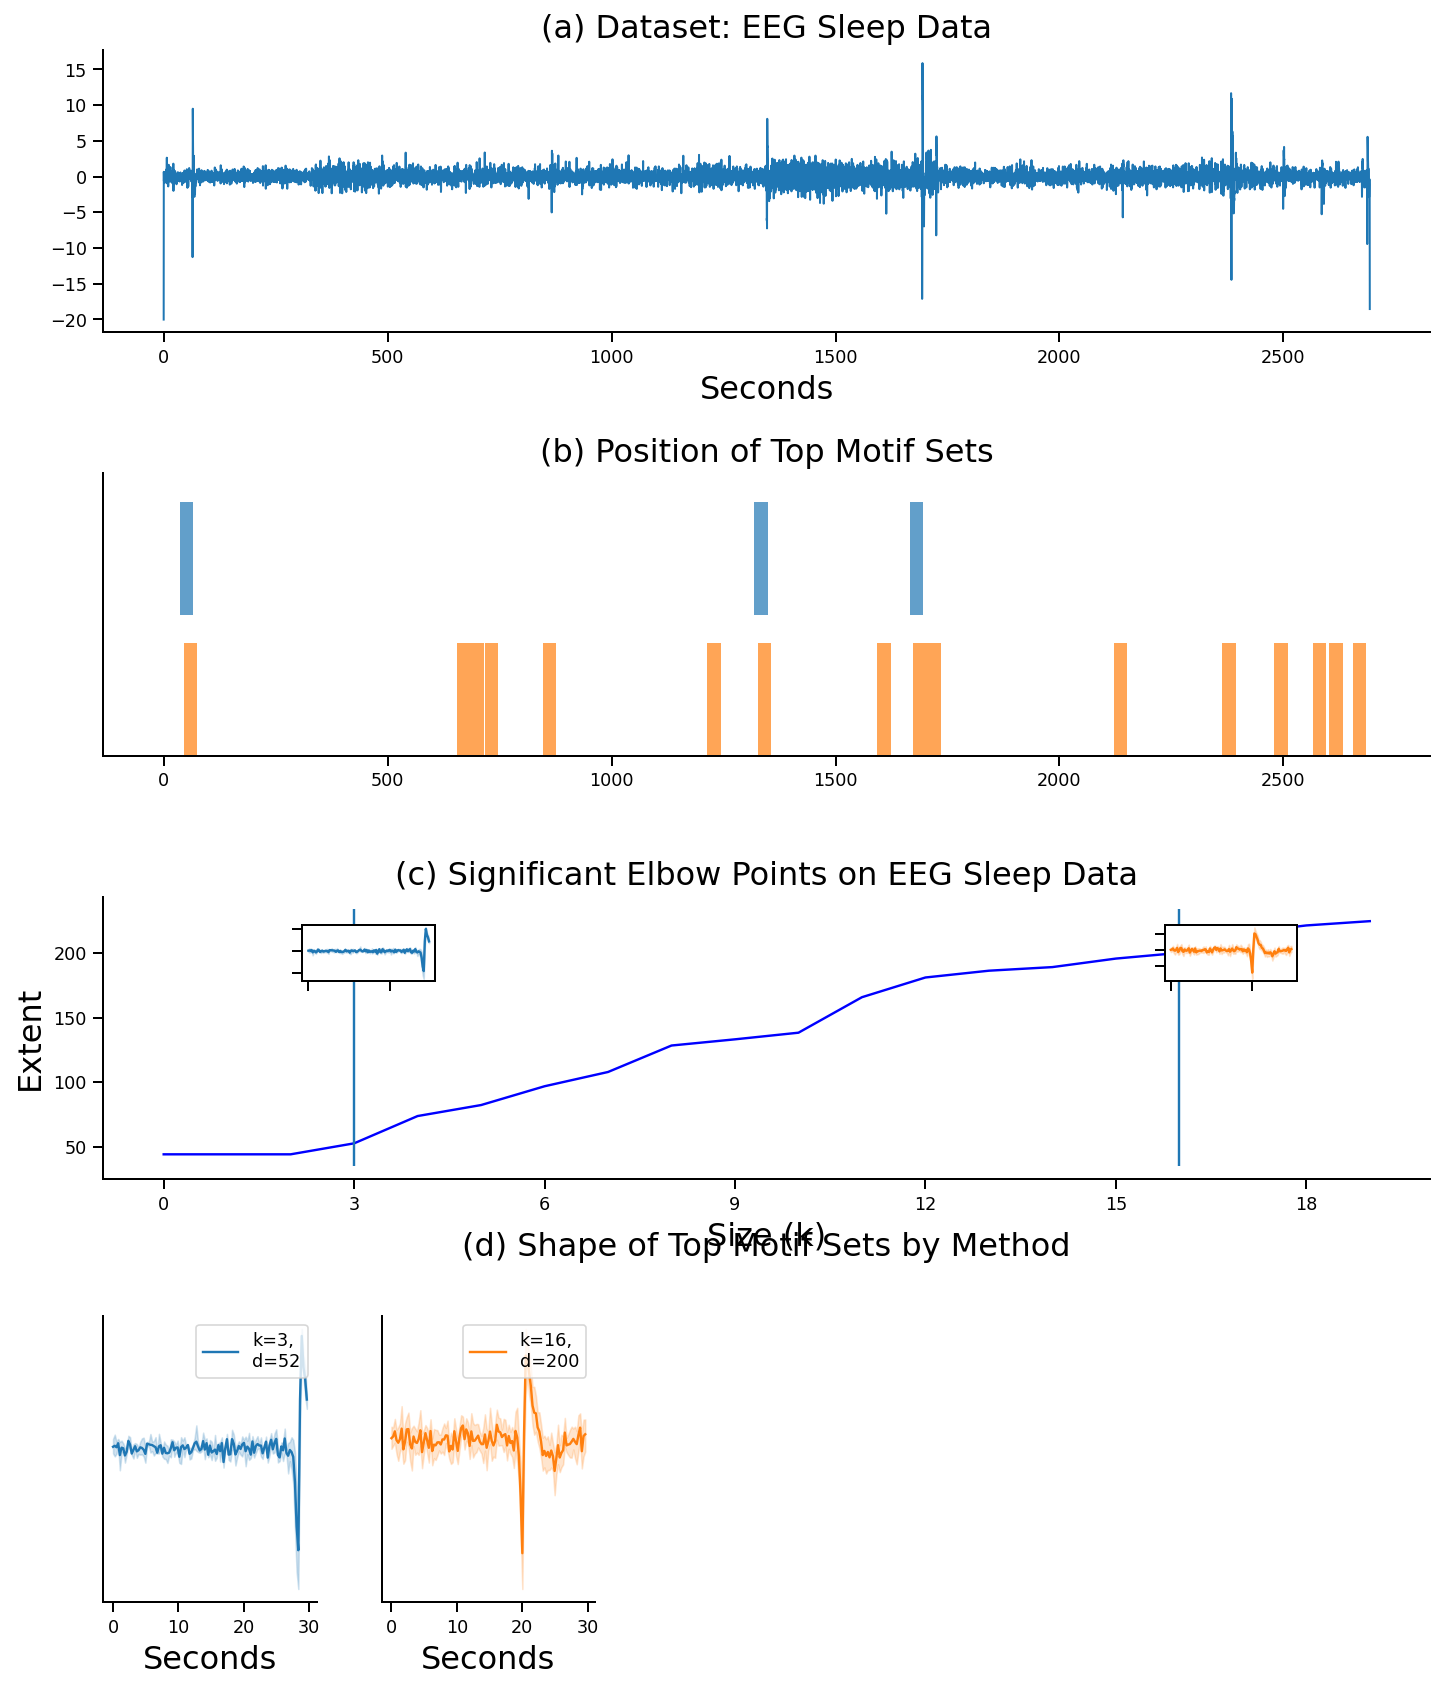

In [11]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=115, ds_name=ds_name)

# Sleep Spindles

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=25, ds_name=ds_name)

Compute ks:  28%|███████████████████▏                                                 | 5/18 [00:09<00:23,  1.80s/it]

<hr>

# Dataset: Winding

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

In [ ]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

# Motif length selection

In [ ]:
ks = 12
length_range = np.arange(20,150,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# Top-1 Motiflets

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name)

# Top-2 Motiflet

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, 
    exclusion=candidates, ds_name=ds_name)

# Motif length 130

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=130, ds_name=ds_name, idx=3)

<hr>

# Dataset: fNIRS Brain Imaging

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

In [ ]:
file = "fNIRS_subLen_600.csv" 
ds_name="fNIRS"
series = ml.read_dataset_with_index(file)
series = series[:5000]
plot_dataset(file, series, ds_name=ds_name)

## Motif Length Selection

In [ ]:
ks = 20
length_range = np.arange(50,201,10)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# Top-1 k-Motiflets

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name, filter=True)

# Top-2 k-Motiflets

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=80, ds_name=ds_name, idx=3, filter=True)